In [1]:
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

In [24]:
# create the training & test sets, skipping the header row with [1:]
dataset = pd.read_csv('/media/sunny/DeepLearning/bangla digit/Digit dataset/bdd_train.csv')
target = dataset[[0]].values.ravel()
train = dataset.iloc[:,1:].values
test = pd.read_csv('/media/sunny/DeepLearning/bangla digit/Digit dataset/bdd_test.csv').values

# create and train the random forest
# multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train, target)
pred = rf.predict(test)

np.savetxt('submission_rand_forest.csv', np.c_[range(1,len(test)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')


In [25]:
print dataset.head()

   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...    0.518  0.519  0.520  \
0  1    0    0    0    0    0    0    0    0  255  ...        0      0      0   
1  2    0  255  255  255  255  255  255  255  255  ...      255    255    255   
2  3    0    0    0    0    0    0    0    0    0  ...        0      0      0   
3  4    0    0    0    0    0    0    0    0    0  ...        0      0      0   
4  5    0    0    0    0    0    0    0    0    0  ...        0      0      0   

   0.521  0.522  0.523  0.524  0.525  0.526  0.527  
0      0      0      0      0      0      0      0  
1    255    255    255    255    255      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 1025 columns]


In [26]:
# convert to array, specify data type, and reshape
target = target.astype(np.uint8)
train = np.array(train).reshape((-1, 1, 32, 32)).astype(np.uint8)
test = np.array(test).reshape((-1, 1, 32, 32)).astype(np.uint8)

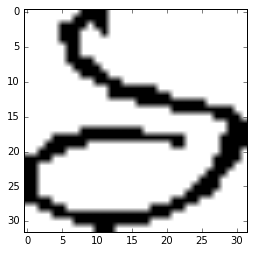

In [32]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(train[4000][0], cmap=cm.binary) # draw the picture

In [35]:
import theano
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize

net1 = NeuralNet(
        layers=[('input', layers.InputLayer),
                ('hidden', layers.DenseLayer),
                ('output', layers.DenseLayer),
                ],
        # layer parameters:
        input_shape=(None,1,32,32),
        hidden_num_units=1000, # number of units in 'hidden' layer
        output_nonlinearity=lasagne.nonlinearities.softmax,
        output_num_units=10,  # 10 target values for the digits 0, 1, 2, ..., 9

        # optimization method:
        update=nesterov_momentum,
        update_learning_rate=0.0001,
        update_momentum=0.9,

        max_epochs=15,
        verbose=1,
        )

In [36]:

# Train the network
net1.fit(train, target)

# Neural Network with 1035010 learnable parameters

## Layer information

  #  name    size
---  ------  -------
  0  input   1x32x32
  1  hidden  1000
  2  output  10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1    45.63903    19.02821    2.39849      0.86889  0.88s
      2     6.80784    10.18273    0.66857      0.90667  0.82s
      3     1.84239     9.91399    0.18584      0.90667  0.99s
      4     0.61679     9.86219    0.06254      0.91222  1.00s
      5     0.31223    10.13757    0.03080      0.91444  0.79s
      6     0.13401     7.82607    0.01712      0.91667  0.78s
      7     0.18043     7.22004    0.02499      0.91444  0.78s
      8     0.07313     8.45810    0.00865      0.91222  0.78s
      9     0.08209     8.45394    0.00971      0.91222  0.79s
     10     0.05517     8.67425    0.00636      0.91778  0.80s
     11     0.02375     8.28731    0.00287      0.92444  0.86s
     12     0.

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fafee3fbed0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fafee3fbdd0>,
     check_input=True, custom_scores=None, hidden_num_units=1000,
     input_shape=(None, 1, 32, 32),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=15, more_params={},
     objective=<function objective at 0x7fafee40b2a8>,
     objective_loss_function=<function categorical_crossentropy at 0x7fafee52c320>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7fafe891aef0>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7fafe891ae18>],
     output_nonlinearity=<function softmax at 0x7faff33002a8>,
     output_num_units

In [38]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),      #Convolutional layer.  Params defined below
        ('pool1', layers.MaxPool2DLayer),   # Like downsampling, for execution speed
        ('conv2', layers.Conv2DLayer),
        ('hidden3', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],

    input_shape=(None, 1, 32, 32),
    conv1_num_filters=7, 
    conv1_filter_size=(3, 3), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    conv2_num_filters=12, 
    conv2_filter_size=(2, 2),    
    conv2_nonlinearity=lasagne.nonlinearities.rectify,
        
    hidden3_num_units=1000,
    output_num_units=10, 
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.0001,
    update_momentum=0.9,

    max_epochs=n_epochs,
    verbose=1,
    )
    return net1

cnn = CNN(30).fit(train,target) # train the CNN model for 15 epochs

# Neural Network with 2363428 learnable parameters

## Layer information

  #  name     size
---  -------  --------
  0  input    1x32x32
  1  conv1    7x30x30
  2  pool1    7x15x15
  3  conv2    12x14x14
  4  hidden3  1000
  5  output   10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     8.85782     2.05468    4.31105      0.62778  2.92s
      2     1.38761     1.37996    1.00554      0.69111  3.05s
      3     0.89309     1.16790    0.76469      0.72667  2.84s
      4     0.67300     1.06023    0.63477      0.74556  2.84s
      5     0.53410     0.98957    0.53972      0.75556  2.83s
      6     0.43465     0.94167    0.46158      0.76889  2.89s
      7     0.36016     0.90389    0.39845      0.77889  2.84s
      8     0.30227     0.87471    0.34557      0.78444  2.83s
      9     0.25546     0.85069    0.30030      0.78556  2.83s
     10     0.21634     0.83342    0.25958      0.79333  2.83s
    

In [39]:
# use the NN model to classify test data
pred = cnn.predict(test)

# save results
np.savetxt('submission_cnn.csv', np.c_[range(1,len(test)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

In [40]:
target

array([1, 2, 3, ..., 7, 8, 9], dtype=uint8)

In [41]:
print target


[1 2 3 ..., 7 8 9]


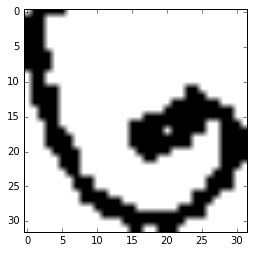

In [44]:
plt.imshow(test[2][0], cmap=cm.binary)